In [166]:
from functions import *
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
combined_data = load_data()

In [168]:
combined_data['DatumPN'] = pd.to_datetime(combined_data['DatumPN'], format='%d.%m.%Y')
combined_data['Weekday'] = combined_data['DatumPN'].dt.day_name()
combined_data['Day'] = combined_data['DatumPN'].dt.day
combined_data['Month'] = combined_data['DatumPN'].dt.month
combined_data['Year'] = combined_data['DatumPN'].dt.year

In [169]:
classification_colors = {
    'Z MATERIALNO ŠKODO': '#377eb8',  
    'Z LAŽJO TELESNO POŠKODBO': '#4daf4a', 
    'S HUDO TELESNO POŠKODBO': '#ff7f00',  
    'S SMRTNIM IZIDOM': '#e41a1c'  
}

In [170]:
first_date = combined_data['DatumPN'].min()
last_date = combined_data['DatumPN'].max()

days = (last_date - first_date).days
weeks = days // 7
months = (last_date.year - first_date.year) * 12 + (last_date.month - first_date.month)
years = combined_data['Year'].nunique()
days, weeks, months, years 

(5477, 782, 179, 15)

# Najnevarnejši meseci

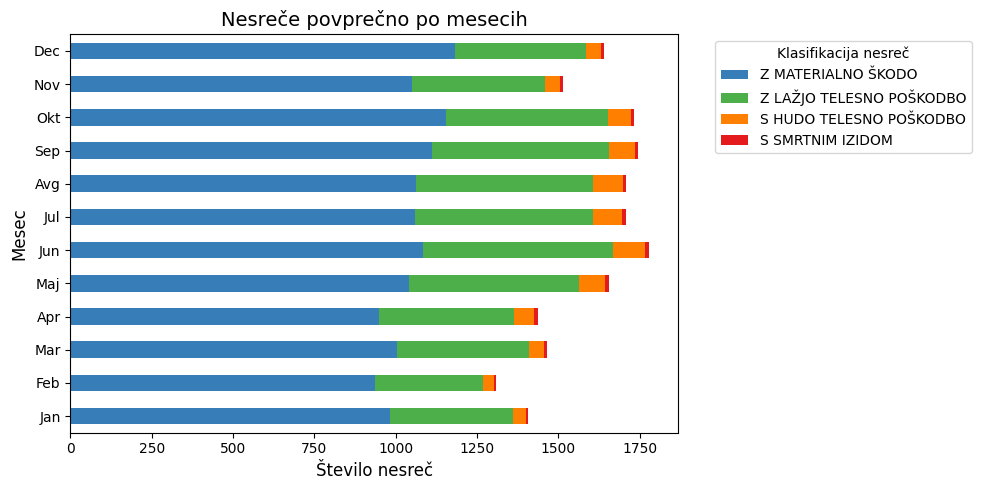

In [171]:
unique_accidents = combined_data.groupby('ZaporednaStevilkaPN').first()

stacked_data = unique_accidents.groupby(['Month', 'KlasifikacijaNesrece']).size().unstack(fill_value=0)

ordered_columns = ['Z MATERIALNO ŠKODO', 'Z LAŽJO TELESNO POŠKODBO', 'S HUDO TELESNO POŠKODBO', 'S SMRTNIM IZIDOM']
stacked_data[ordered_columns] = stacked_data[ordered_columns] / years

stacked_data = stacked_data[ordered_columns]

stacked_data.plot(
    kind='barh',
    stacked=True,
    color=[classification_colors.get(col, 'gray') for col in stacked_data.columns],
    figsize=(10, 5)
)

plt.title('Nesreče povprečno po mesecih', fontsize=14)
plt.xlabel('Število nesreč', fontsize=12)
plt.ylabel('Mesec', fontsize=12)
plt.yticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun', 'Jul', 'Avg', 'Sep', 'Okt', 'Nov', 'Dec'])
plt.legend(title='Klasifikacija nesreč', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

# Najnevarnejši dnevi v tednu

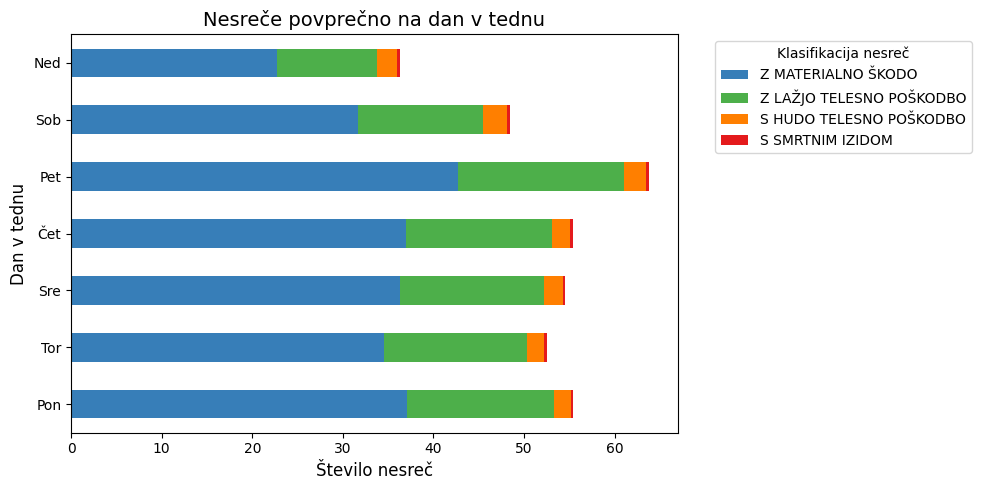

In [172]:
unique_accidents = combined_data.groupby('ZaporednaStevilkaPN').first()

stacked_data = unique_accidents.groupby(['Weekday', 'KlasifikacijaNesrece']).size().unstack(fill_value=0)

ordered_columns = ['Z MATERIALNO ŠKODO', 'Z LAŽJO TELESNO POŠKODBO', 'S HUDO TELESNO POŠKODBO', 'S SMRTNIM IZIDOM']
stacked_data[ordered_columns] = stacked_data[ordered_columns] / weeks

stacked_data = stacked_data[ordered_columns]
stacked_data = stacked_data.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    axis=0
)

stacked_data.plot(
    kind='barh',
    stacked=True,
    color=[classification_colors.get(col, 'gray') for col in stacked_data.columns],
    figsize=(10, 5)
)

plt.title('Nesreče povprečno na dan v tednu', fontsize=14)
plt.xlabel('Število nesreč', fontsize=12)
plt.ylabel('Dan v tednu', fontsize=12)
plt.yticks(range(0, 7), ['Pon', 'Tor', 'Sre', 'Čet', 'Pet', 'Sob', 'Ned'])
plt.legend(title='Klasifikacija nesreč', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()